In [164]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import scale

from code.organize import *
from code.roughEDA import *
from code.survey_processor_full import *
from code.model_vis import *
from code.fc import *
from code.fc_cluster import *
from code.clusterEDA import *


import plotly.plotly as py
from plotly.tools import FigureFactory as FF
import plotly.graph_objs as go

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In this file, I will wrapp up the clusions from step7_cluster_study and more concise graphs. 

In [2]:
df = pd.read_pickle('data/df_id.pkl')       # Load survey data with cluster_id
fc = FeatureContribution('data/fc_df2.pkl')  # Load feature contribution data
fc_df = fc.cluster_processor(3,6)            # generate cluster

# Cluster 1 (Unemployed)

Main contributors
* ### agekdbrn: historgram and median. Median is easier to interpret and I will use to for presentation slide.

In [3]:
c1 =df[df.cluster==1]

In [5]:
c1.agekdbrn.median()

19.0

* ### degree: Respondents' degree in this cluster is very speciall. All less than high school. So I can just write a sentence or use an icon to summerize it. 

* ### dwelling, class_ and incom16 all reflect respondents financial situation some how. Select interesting part of each and put on the same bar chart.

In [15]:
c1_fin = subset_all(df,1,['incom16','dwelling','class_'],[['Far below average','Below average'],
                                                           ['Row house','Trailer'],['Lower class']])

In [58]:
trace0 = go.Bar(
    x = c1_fin.columns,
    y = all_try.iloc[0,:].values,
    name = 'Rest of Population',
    marker = dict(
        color = 'rgb(3, 31, 73)'
    )
)
trace1 = go.Bar(
    x = all_try.columns,
    y = all_try.iloc[1,:].values,
    name = 'Cluster_1',
    marker = dict(
        color = 'rgb(86, 247, 59)'
    )
)


data = [trace0,trace1]

layout = go.Layout(

    #title = "Living Condtion and Financial Situation",
    font = dict(size = 30),
    plot_bgcolor="rgba(173, 182, 167, 0.08)",
    xaxis=dict(
         titlefont=dict(size = 8 )
    )
)
    
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename = "cluster1 financial")

* ### Political views and social life reflect respondents' world view and life style. 

In [27]:
c1_life = subset_all(df,1,['polviews','socfrend'],[["Don't know", 'Extremely liberal'],['Never']])

In [56]:
## make a bar chart using plotly

fig = plotly_bar(c1_life,'rgb(3, 31, 73)','rgb(86, 247, 59)','World View and Life Style')
py.iplot(fig, filename='cluster1 lifestyle')

# Cluster 4 (Employed)

* ### agekdbrn

In [45]:
df[df.cluster==4].agekdbrn.median()

19.0

* ## degree

In [46]:
df[df.cluster==4].degree.value_counts()

Lt high school    259
Name: degree, dtype: int64

* ### dwelling and incom 16

In [47]:
c4_fin = subset_all(df,4,['dwelling','incom16'],[['Detached 1-fam house'],['Far below average']])

In [55]:
fig = plotly_bar(c4_fin,'rgb(109, 85, 69)','rgb(250, 102, 4)','Living Condition')
py.iplot(fig, filename = 'cluster 4 living condition')

* ### politics: polviews

In [60]:
c4_pol = subset_normed_df(df,4,'polviews',["Don't know"])

In [62]:
fig = plotly_bar(c4_pol,'rgb(109, 85, 69)','rgb(250, 102, 4)','Political View')
py.iplot(fig, filename='cluster 4 politics')

# Cluster 5 (Unemployed)

* ### agekdbrn 

In [65]:
df[df.cluster ==5].agekdbrn.median()

22.0

* ### sphrs1

In [89]:
c5 = df[df.cluster==5]

c5[c5.sphrs1 <98].sphrs1.mean()

47.16

* ### Degree

In [100]:
c5_edu = subset_normed_df(df,5, 'degree',['High school','Bachelor','Graduate'])

In [102]:
fig = plotly_bar(c5_edu, 'rgb(183, 171, 163)', 'rgba(224, 4, 133)', 'Degree')
py.iplot(fig,filename = 'cluster 5 education')

PlotlyError: Request throttled. You've created/updated more charts than your allowed limit of 50/day. You may either wait one day or upgrade your account. Visit https://plot.ly/settings/subscription/ to upgrade.

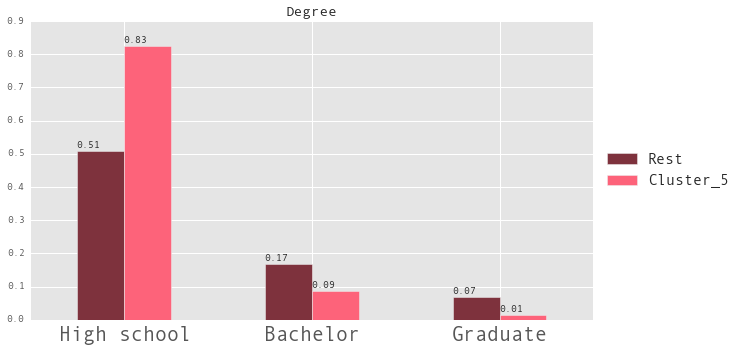

In [173]:
comb_bar(c5_edu,color = ['#7E323D', '#FD637A'], title = 'Degree',figsize=(9,5))

* ### Financial Situation and Dwelling

In [151]:
c5_fin = subset_all(df,5,['dwelling','finrela'],
                    [['Apartment-4 stories','Apartment house'],
                    ['Below average','Far below average']])

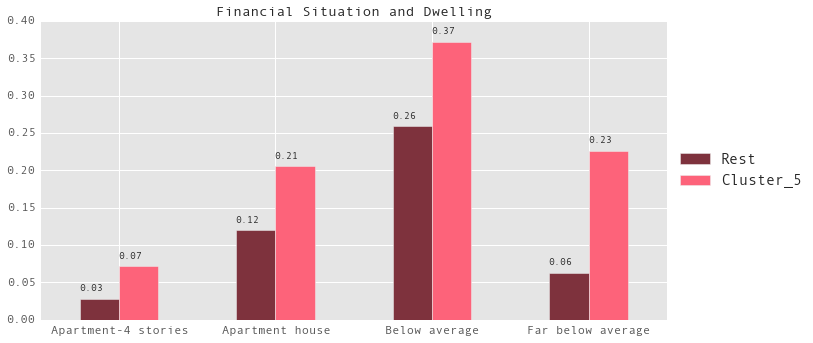

In [174]:
comb_bar(c5_fin, color = ['#7E323D', '#FD637A'],
         title = "Financial Situation and Dwelling", figsize = (10,5), fontsize = 12)


# Cluster 3 (Employed)

* ### agekdbrn

In [187]:
df[df.cluster ==3].agekdbrn.median()

21.0

* ### degree

In [189]:
c3_degree = subset_normed_df(df,3,'degree',['High school','Bachelor'])

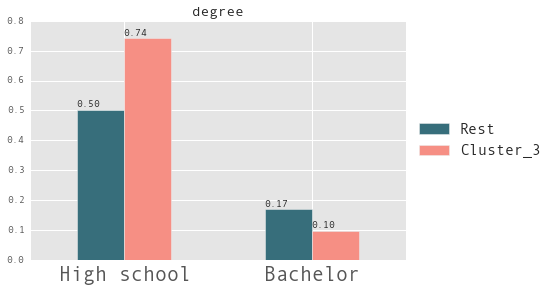

In [199]:
comb_bar(c3_degree,color = ['#376E7B', '#F68F84'],title = 'degree')

In [200]:
c3_class = subset_normed_df(df,3,'class_', ['Working class'])

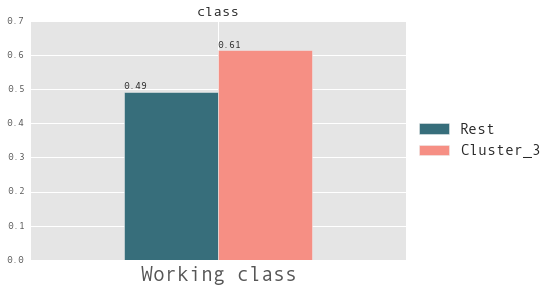

In [201]:
comb_bar(c3_class,color = ['#376E7B', '#F68F84'],title = 'class')

In [206]:
c3_mari = subset_normed_df(df,3, 'marital',['Divorced', 'Never married', 'Married'])

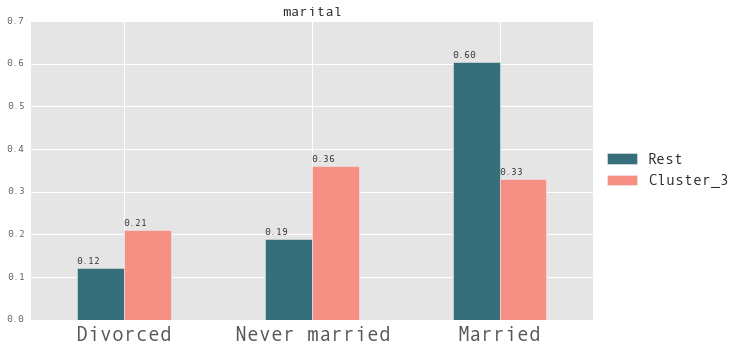

In [208]:
comb_bar(c3_mari,color = ['#376E7B', '#F68F84'],title = 'marital', figsize = (9,5))

# Cluster 2 (Unemployed)


* ### agekdbrn 

In [209]:
df[df.cluster==2].agekdbrn.median()

25.0

* ### sphrs1

In [215]:
c2 = df[df.cluster==2]

c2[c2.sphrs1 <98].sphrs1.median()

50.0

In [219]:
df[df.sphrs1<98].sphrs1.median()

44.0

* ### coninc

In [216]:
df.coninc.median()

32273.0

In [217]:
df[df.cluster ==2].coninc.median()

52811.0

* ### partyid, polviews, reliten

In [234]:
c2_views = subset_all(df,2, ['partyid','polviews','reliten'] , 
                      [['Strong republican','Not str republican'],
                      ['Extrmly conservative','Conservative'],
                       ['Strong']
                      ])

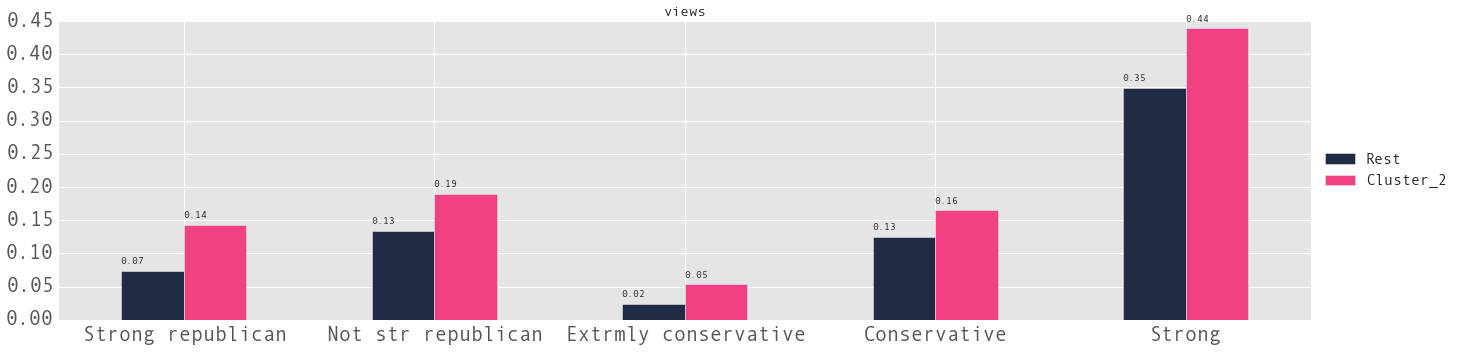

In [237]:
comb_bar(c2_views, color = ['#202C46','#F14183'], figsize = (20,5),fontsize = 20, title = "views")

* ### res16, incom 16

In [238]:
c2_16 = subset_all(df,2,['res16','incom16'],
                  [['Big-city suburb'],
                  ['Above average','Average']])

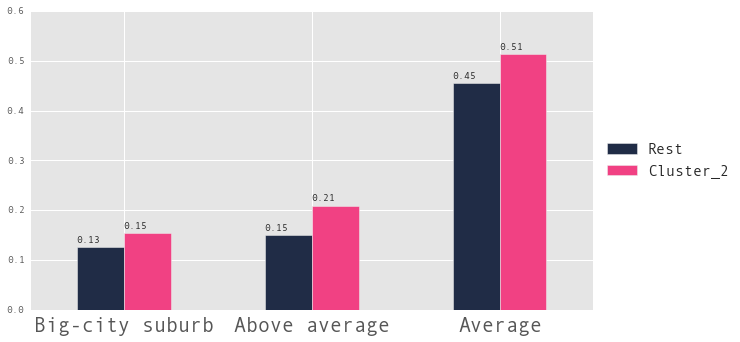

In [241]:
comb_bar(c2_16,color = ['#202C46','#F14183'], figsize = (9,5))

# Cluster 0

* ### coninc

In [242]:
df[df.cluster == 0].coninc.median()

49882.5

* ### agekdbrn

In [243]:
df[df.cluster ==0].agekdbrn.median()

25.0